In [64]:
import pandas as pd
import numpy as np

In [65]:
data = pd.read_csv('/content/merged_data- Descriptive.csv')

In [66]:
data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,AARON BERGMAN,ALBERTA,WEST,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,ALEKSANDRA GANNAWAY,SASKACHEWAN,PRARIE,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,ALLEN ARMOLD,NEW BRUNSWICK,ATLANTIC,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [67]:
data.describe()  #statistical description of the data

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [68]:
data.describe(percentiles = [0.05,0.10, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
5%,34.178000,0.000000,3.000000,-592.439000,0.800000,0.360000
10%,60.688000,0.010000,5.000000,-265.740000,1.250000,0.360000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
80%,2302.901000,0.080000,41.000000,274.932000,19.990000,0.600000


In [69]:
data.describe(include = 'object')  #show statistical info for categorical columns

,Ord_id,Prod_id,Ship_id,Cust_id,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub_Category
count,8399,8399,8399,8399,8399,8399,8399,8399,8399,8399
unique,5506,17,7701,1832,795,13,8,4,3,17
top,Ord_542,Prod_6,SHP_1378,Cust_1140,DARREN BUDD,ONTARIO,WEST,CORPORATE,OFFICE SUPPLIES,PAPER
freq,6,1225,4,30,41,1826,1991,3076,4610,1225


In [70]:
min(data['Sales'])

2.24

In [71]:
max(data['Sales'])

89061.05

In [72]:
Q1 = np.percentile(data['Sales'], 25)
Q3 = np.percentile(data['Sales'], 75)

In [73]:
IQR = Q3 - Q1

In [74]:
IQR

1566.1250000000002

In [75]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [76]:
data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

In [77]:
data.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7318.000000
mean,742.563596,0.049768,24.330026,-0.489874,10.028763,0.502901
std,905.987551,0.031863,14.412902,445.053341,13.883265,0.134360
min,2.240000,0.000000,1.000000,-11861.460000,0.490000,0.350000
25%,126.680000,0.020000,12.000000,-83.750000,2.830000,0.380000
50%,321.020000,0.050000,24.000000,-6.720000,5.580000,0.490000
75%,1038.820000,0.080000,37.000000,75.580000,8.990000,0.590000
max,4054.058000,0.250000,50.000000,2235.370000,143.710000,0.850000


In [78]:
data.shape

(7357, 16)

In [79]:
8399 - 7357

1042

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7357 entries, 0 to 8398
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ord_id                7357 non-null   object 
 1   Prod_id               7357 non-null   object 
 2   Ship_id               7357 non-null   object 
 3   Cust_id               7357 non-null   object 
 4   Sales                 7357 non-null   float64
 5   Discount              7357 non-null   float64
 6   Order_Quantity        7357 non-null   int64  
 7   Profit                7357 non-null   float64
 8   Shipping_Cost         7357 non-null   float64
 9   Product_Base_Margin   7318 non-null   float64
 10  Customer_Name         7357 non-null   object 
 11  Province              7357 non-null   object 
 12  Region                7357 non-null   object 
 13  Customer_Segment      7357 non-null   object 
 14  Product_Category      7357 non-null   object 
 15  Product_Sub_Category  7357

In [81]:
data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,AARON BERGMAN,ALBERTA,WEST,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,ALEKSANDRA GANNAWAY,SASKACHEWAN,PRARIE,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,ALLEN ARMOLD,NEW BRUNSWICK,ATLANTIC,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [82]:
import pandas as pd

In [83]:
for_corr = data.select_dtypes(include=['number'])
for_corr.corr()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Sales,1.000000,-0.015179,0.222305,0.128932,0.436985,0.292874
Discount,-0.015179,1.000000,-0.004253,-0.055290,0.008672,0.013224
Order_Quantity,0.222305,-0.004253,1.000000,0.167571,-0.148288,-0.057800
Profit,0.128932,-0.055290,0.167571,1.000000,-0.366033,-0.202069
Shipping_Cost,0.436985,0.008672,-0.148288,-0.366033,1.000000,0.339226
Product_Base_Margin,0.292874,0.013224,-0.057800,-0.202069,0.339226,1.000000


In [84]:
#to check the correlation in the given data
# data.corr()   #correlation matrix

In [85]:
import seaborn as sns

<Axes: >

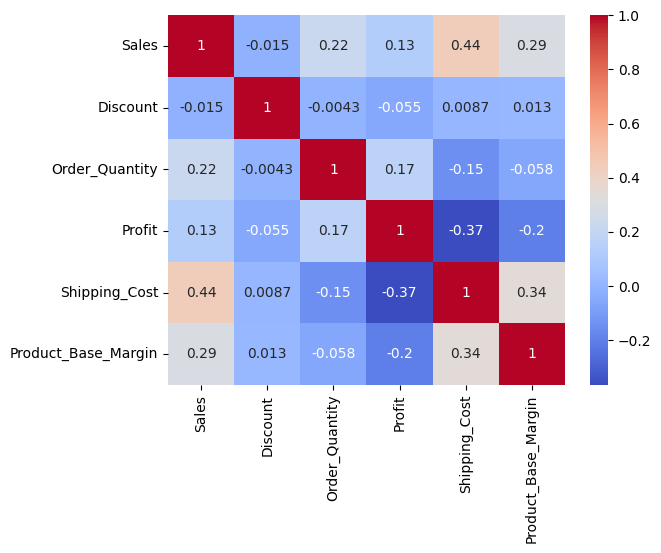

In [86]:
sns.heatmap(for_corr.corr(), cmap = 'coolwarm',annot = True)

In [87]:
data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Customer_Name,Province,Region,Customer_Segment,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,AARON BERGMAN,ALBERTA,WEST,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,ALEKSANDRA GANNAWAY,SASKACHEWAN,PRARIE,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,ALLEN ARMOLD,NEW BRUNSWICK,ATLANTIC,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

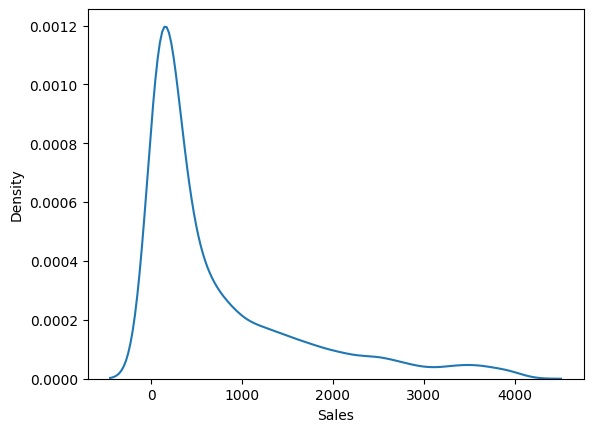

In [89]:
sns.kdeplot(data['Sales'])
plt.show()

#### Log Transformation

In [90]:
data['Sales_log'] = np.log(data['Sales'])

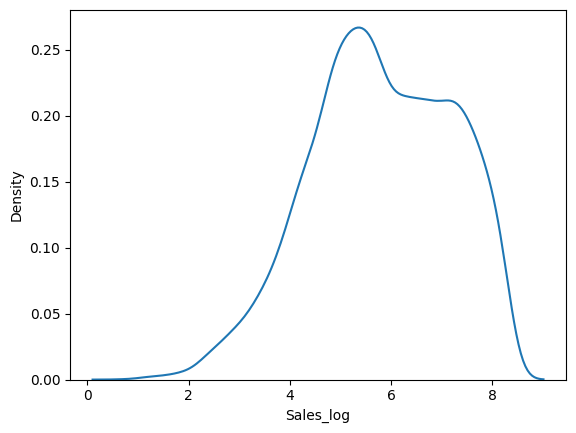

In [91]:
sns.kdeplot(data['Sales_log'])
plt.show()

#### Square root transformation

In [92]:
data['Sales_sqrt_transform'] = np.sqrt(data['Sales'])

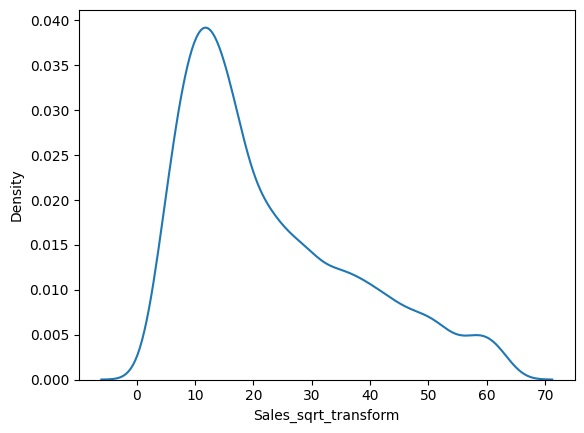

In [93]:
sns.kdeplot(data['Sales_sqrt_transform'])
plt.show()

In [94]:
from scipy import stats

In [95]:
data['Sales_boxcox'] = stats.boxcox(data['Sales'])[0]

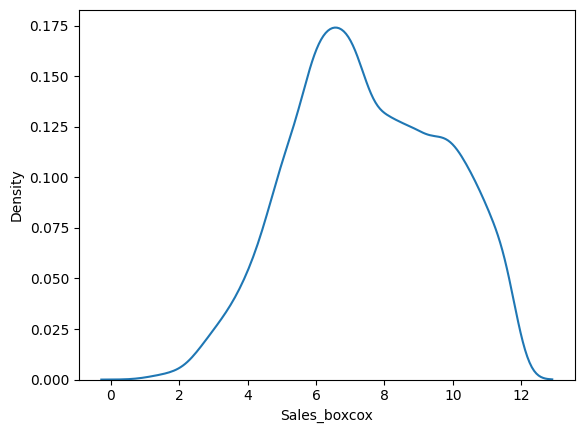

In [96]:
sns.kdeplot(data['Sales_boxcox'])
plt.show()

In [97]:
tips = pd.read_csv('/content/tips.csv')

In [98]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


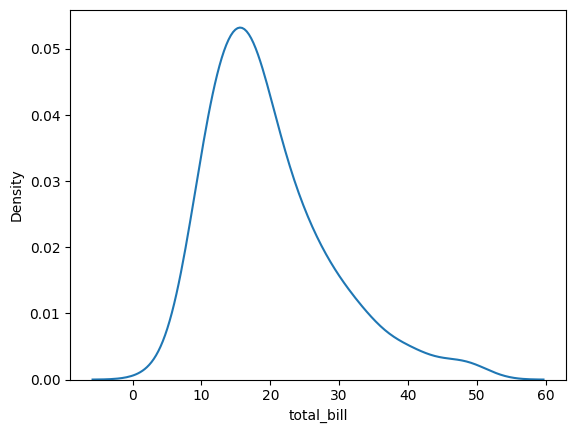

In [99]:
sns.kdeplot(tips['total_bill'])
plt.show()

In [100]:
tips['Bill_log'] = np.log(tips['total_bill'])

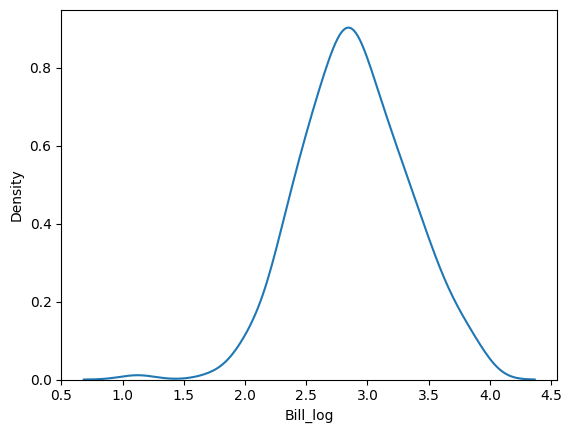

In [101]:
sns.kdeplot(tips['Bill_log'])
plt.show()

In [102]:
tips['bill_sqrt'] = np.sqrt(tips['total_bill'])

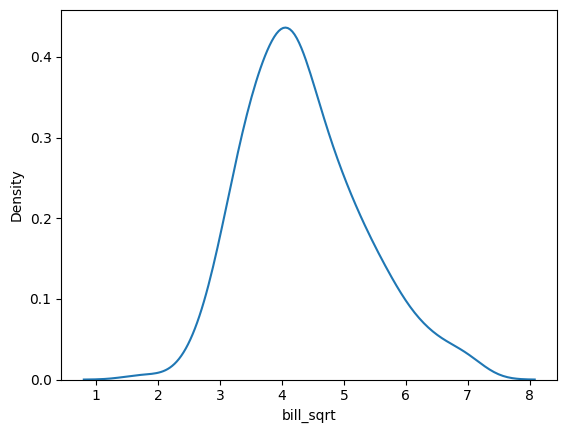

In [103]:
sns.kdeplot(tips['bill_sqrt'])
plt.show()

In [104]:
import scipy.stats as stats

tips['bill_boxcox'] = stats.boxcox(tips['total_bill'])[0]

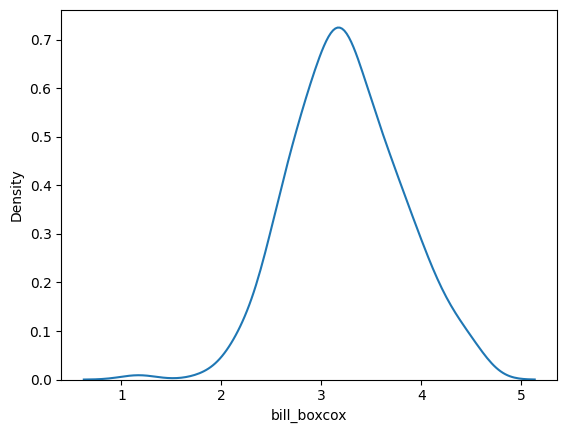

In [105]:
sns.kdeplot(tips['bill_boxcox'])
plt.show()